In [49]:
import sqlite3
import pandas as pds
import matplotlib.pyplot as plt
import numpy as nump
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


# Create your connection.
conn = sqlite3.connect('tweet_metro.db')
df = pds.read_sql_query("SELECT * FROM tweet_metro", conn)

#df.columns

#df.describe().transpose()

#df 

In [50]:
df.columns

Index(['created', 'texts', 'retweet', 'hashtags', 'followers', 'friends',
       'Username'],
      dtype='object')

In [51]:
df.describe().transpose()

,count,unique,top,freq
created,43,27,2019-02-10 13:33:39,2
texts,37,33,b'RT @TimesofIslambad: PM Modi responsible for...,2
retweet,37,25,0,7
hashtags,37,8,None,25
followers,37,34,546,2
friends,37,35,1557,2
Username,16,16,b'Kumar ramesh'\r,1


In [52]:
df

,created,texts,retweet,hashtags,followers,friends,Username
0,"2019-02-10 13:34:00,""b'RT @manuraj1983: Whethe...",None,None,None,None,None,None
1,;,None,None,None,None,None,None
2,"2019-02-10 13:33:54,""b""""RT @pruthvirajdv: Beng...",None,None,None,None,None,None
3,"2019-02-10 13:34:00,""b'RT @manuraj1983: Whethe...",None,None,None,None,None,None
4,;,None,None,None,None,None,None
5,"2019-02-10 13:33:54,""b""""RT @pruthvirajdv: Beng...",None,None,None,None,None,None
6,created,text,retwc,hashtag,followers,friends\r,None
7,2019-02-10 13:34:00,b'RT @manuraj1983: Whether you land in Chennai...,1177,None,1,5,None
8,2019-02-10 13:34:00,"b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...",1762,TNWelcomesModi,1573,802,None
9,2019-02-10 13:33:57,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,268,908,None


In [5]:
df.isnull().any().any(),df.shape

(False, (21, 6))

In [6]:
df.texts

0                                                  text
1     b'RT @manuraj1983: Whether you land in Chennai...
2     b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...
3     b'RT @srivatsayb: Yeddyurappa has accepted tha...
4     b'RT @srivatsayb: Yeddyurappa has accepted tha...
5     b"RT @Pun_Starr: Now don't blame Modiji for tr...
6     b'RT @Ahmedshabbir20: Netizens from 3 states T...
7     b"RT @pruthvirajdv: Bengaluru needs a Sub-Urba...
8     b"RT @srivatsayb: I met MLAs and offered money...
9     b'RT @yazhinisundaram: @DrTamilisaiBJP  has th...
10    b'RT @PTelangana: #GoBackModi means Go Back to...
11    b'RT @RevathyNS: Andhra Pradesh NH \xe2\x9d\xa...
12    b"RT @srivatsayb: I met MLAs and offered money...
13    b'RT @BhavikaKapoor5: Why @narendramodi should...
14    b'RT @DrAMSinghvi: Well Done people of Assam, ...
15    b'RT @KamalaAkka: Rs 200 cr bribe to MLAs.\n\n...
16    b'Hay everyone #GoodEvening followers \xf0\x9f...
17    b'I was in MGR nagar for 3 years, the KK n

In [7]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
hist1,edge1=nump.histogram(df.retweet)
plt.bar(edge1[:1],hist1,width=edge1[1:]-edge1[:-1])

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
df.retweet


In [9]:
relaton=df[1:20][['retweet','followers']]

In [10]:
twiter_data=pds.read_csv('result_4_metro.csv')

In [11]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<BarContainer object of 10 artists>

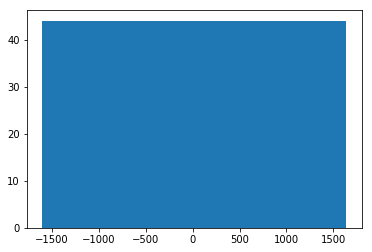

In [12]:
hist1,edge1=nump.histogram(twiter_data.followers)
plt.bar(edge1[:1],hist1,width=edge1[1:]-edge1[:-1])

In [13]:
relations=relaton['retweet'].corr(relaton['followers'])

AttributeError: 'float' object has no attribute 'shape'

In [14]:
relaton

,retweet,followers
1,1177,1
2,1762,1573
3,601,268
4,601,2131
5,409,88
6,440,494
7,27,546
8,1258,140
9,1,579
10,1,115


In [15]:
type(relaton)

pandas.core.frame.DataFrame

In [16]:
related = df['followers'].corr(df['retweet'])

TypeError: must be str, not int

In [17]:
df.sort_values(['retweet'],ascending=[False])

TypeError: '<' not supported between instances of 'str' and 'int'

In [18]:
df

,created,texts,retweet,hashtags,followers,friends
0,created,text,retwc,hashtag,followers,friends\r
1,2019-02-10 13:34:00,b'RT @manuraj1983: Whether you land in Chennai...,1177,None,1,5
2,2019-02-10 13:34:00,"b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...",1762,TNWelcomesModi,1573,802
3,2019-02-10 13:33:57,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,268,908
4,2019-02-10 13:33:56,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,2131,2280
5,2019-02-10 13:33:55,"b""RT @Pun_Starr: Now don't blame Modiji for tr...",409,GoBackModi,88,182
6,2019-02-10 13:33:54,b'RT @Ahmedshabbir20: Netizens from 3 states T...,440,GoBackModi,494,895
7,2019-02-10 13:33:54,"b""RT @pruthvirajdv: Bengaluru needs a Sub-Urba...",27,None,546,4543
8,2019-02-10 13:33:53,"b""RT @srivatsayb: I met MLAs and offered money...",1258,None,140,63
9,2019-02-10 13:33:53,b'RT @yazhinisundaram: @DrTamilisaiBJP has th...,1,GoBackModi,579,1557


In [19]:
relaton=df[1:20][['created','texts','retweet','hashtags','followers','friends']]


In [20]:
relaton

,created,texts,retweet,hashtags,followers,friends
1,2019-02-10 13:34:00,b'RT @manuraj1983: Whether you land in Chennai...,1177,None,1,5
2,2019-02-10 13:34:00,"b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...",1762,TNWelcomesModi,1573,802
3,2019-02-10 13:33:57,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,268,908
4,2019-02-10 13:33:56,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,2131,2280
5,2019-02-10 13:33:55,"b""RT @Pun_Starr: Now don't blame Modiji for tr...",409,GoBackModi,88,182
6,2019-02-10 13:33:54,b'RT @Ahmedshabbir20: Netizens from 3 states T...,440,GoBackModi,494,895
7,2019-02-10 13:33:54,"b""RT @pruthvirajdv: Bengaluru needs a Sub-Urba...",27,None,546,4543
8,2019-02-10 13:33:53,"b""RT @srivatsayb: I met MLAs and offered money...",1258,None,140,63
9,2019-02-10 13:33:53,b'RT @yazhinisundaram: @DrTamilisaiBJP has th...,1,GoBackModi,579,1557
10,2019-02-10 13:33:48,b'RT @PTelangana: #GoBackModi means Go Back to...,1,GoBackModi,115,88


In [21]:
relaton.sort_values(['retweet'],ascending=[False])

,created,texts,retweet,hashtags,followers,friends
2,2019-02-10 13:34:00,"b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...",1762,TNWelcomesModi,1573,802
8,2019-02-10 13:33:53,"b""RT @srivatsayb: I met MLAs and offered money...",1258,None,140,63
12,2019-02-10 13:33:47,"b""RT @srivatsayb: I met MLAs and offered money...",1258,None,326,521
1,2019-02-10 13:34:00,b'RT @manuraj1983: Whether you land in Chennai...,1177,None,1,5
11,2019-02-10 13:33:48,b'RT @RevathyNS: Andhra Pradesh NH \xe2\x9d\xa...,807,GobackModi,362,721
3,2019-02-10 13:33:57,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,268,908
4,2019-02-10 13:33:56,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,2131,2280
14,2019-02-10 13:33:46,"b'RT @DrAMSinghvi: Well Done people of Assam, ...",544,None,26,235
6,2019-02-10 13:33:54,b'RT @Ahmedshabbir20: Netizens from 3 states T...,440,GoBackModi,494,895
5,2019-02-10 13:33:55,"b""RT @Pun_Starr: Now don't blame Modiji for tr...",409,GoBackModi,88,182


In [22]:
relaton.sort_values(['followers'],ascending=[False])

,created,texts,retweet,hashtags,followers,friends
13,2019-02-10 13:33:47,b'RT @BhavikaKapoor5: Why @narendramodi should...,46,None,77937,5693
18,2019-02-10 13:33:44,b'RT @mohazamil: The Soul Tiger Of South India...,1,GoBackSadistModi,6271,729
4,2019-02-10 13:33:56,b'RT @srivatsayb: Yeddyurappa has accepted tha...,601,None,2131,2280
2,2019-02-10 13:34:00,"b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...",1762,TNWelcomesModi,1573,802
19,2019-02-10 13:33:39,"b'RT @Mayavi101: @arunjaitley Sir, Chill , Con...",19,None,910,806
9,2019-02-10 13:33:53,b'RT @yazhinisundaram: @DrTamilisaiBJP has th...,1,GoBackModi,579,1557
17,2019-02-10 13:33:44,"b'I was in MGR nagar for 3 years, the KK nagar...",0,None,579,1557
7,2019-02-10 13:33:54,"b""RT @pruthvirajdv: Bengaluru needs a Sub-Urba...",27,None,546,4543
15,2019-02-10 13:33:45,b'RT @KamalaAkka: Rs 200 cr bribe to MLAs.\n\n...,129,None,546,4543
6,2019-02-10 13:33:54,b'RT @Ahmedshabbir20: Netizens from 3 states T...,440,GoBackModi,494,895


In [23]:
relaton.texts

1     b'RT @manuraj1983: Whether you land in Chennai...
2     b'RT @SuryahSG: #TNWelcomesModi Total - 4,95,0...
3     b'RT @srivatsayb: Yeddyurappa has accepted tha...
4     b'RT @srivatsayb: Yeddyurappa has accepted tha...
5     b"RT @Pun_Starr: Now don't blame Modiji for tr...
6     b'RT @Ahmedshabbir20: Netizens from 3 states T...
7     b"RT @pruthvirajdv: Bengaluru needs a Sub-Urba...
8     b"RT @srivatsayb: I met MLAs and offered money...
9     b'RT @yazhinisundaram: @DrTamilisaiBJP  has th...
10    b'RT @PTelangana: #GoBackModi means Go Back to...
11    b'RT @RevathyNS: Andhra Pradesh NH \xe2\x9d\xa...
12    b"RT @srivatsayb: I met MLAs and offered money...
13    b'RT @BhavikaKapoor5: Why @narendramodi should...
14    b'RT @DrAMSinghvi: Well Done people of Assam, ...
15    b'RT @KamalaAkka: Rs 200 cr bribe to MLAs.\n\n...
16    b'Hay everyone #GoodEvening followers \xf0\x9f...
17    b'I was in MGR nagar for 3 years, the KK nagar...
18    b'RT @mohazamil: The Soul Tiger Of South I

In [25]:
relaton.texts=relaton.texts.apply(lambda x: x.lower())

In [26]:
relaton.texts

1     b'rt @manuraj1983: whether you land in chennai...
2     b'rt @suryahsg: #tnwelcomesmodi total - 4,95,0...
3     b'rt @srivatsayb: yeddyurappa has accepted tha...
4     b'rt @srivatsayb: yeddyurappa has accepted tha...
5     b"rt @pun_starr: now don't blame modiji for tr...
6     b'rt @ahmedshabbir20: netizens from 3 states t...
7     b"rt @pruthvirajdv: bengaluru needs a sub-urba...
8     b"rt @srivatsayb: i met mlas and offered money...
9     b'rt @yazhinisundaram: @drtamilisaibjp  has th...
10    b'rt @ptelangana: #gobackmodi means go back to...
11    b'rt @revathyns: andhra pradesh nh \xe2\x9d\xa...
12    b"rt @srivatsayb: i met mlas and offered money...
13    b'rt @bhavikakapoor5: why @narendramodi should...
14    b'rt @dramsinghvi: well done people of assam, ...
15    b'rt @kamalaakka: rs 200 cr bribe to mlas.\n\n...
16    b'hay everyone #goodevening followers \xf0\x9f...
17    b'i was in mgr nagar for 3 years, the kk nagar...
18    b'rt @mohazamil: the soul tiger of south i

In [27]:
relaton.texts=relaton.texts.apply(lambda x: x.lower())

In [28]:
relaton.texts.split(':')

AttributeError: 'Series' object has no attribute 'split'

In [29]:
type(relaton.texts)

pandas.core.series.Series

In [30]:
s = relaton.texts.to_frame()
type(s)

pandas.core.frame.DataFrame

In [31]:
c=relaton.texts.values[0]

In [32]:
c

"b'rt @manuraj1983: whether you land in chennai, madurai or tiruppur, we have the same message for you and your sangh compatriots:\\n\\n#gobackmod\\xe2\\x80\\xa6'"

In [33]:
c[0]

'b'

In [34]:
import re

result = re.search('@(.*): ', c)
print(result.group(1))

manuraj1983


In [35]:
import tweepy 
auth = tweepy.OAuthHandler('70K9Xv549k0HNty0dvTGx5Tpz', 'N6zvALwa6d5LCF0VqfCuvWfOFQkqsHblU3yw2XXZUZqWZaGH4v')  
#added os.environ to hopefully read the config vars as added on heroku but not tested
auth.set_access_token('3170648335-NVnmWZTNwsFAbgrPC1lh4vJ0CA9mipLNFXvSN6x', 'U7sqL0mKO4uypD6sI34DOZxAAgdvfCp1WJYhckoiUNneB')  
api = tweepy.API(auth)


status_cursor = tweepy.Cursor(api.user_timeline, screen_name="billybob", count=10,tweet_mode='extended')
status_list = status_cursor.iterator.next()

In [36]:
status_list

[Status(_api=<tweepy.api.API object at 0x000001EF84A38710>, _json={'created_at': 'Wed Mar 09 04:03:35 +0000 2011', 'id': 45333886930124800, 'id_str': '45333886930124800', 'full_text': 'Hey monkey nuts were now live on hulu! Check us out!\nhttp://www.hulu.com/watch/221783/trailer-trash-faceoff?from=fb_share', 'truncated': False, 'display_text_range': [0, 121], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://mobile.twitter.com" rel="nofollow">Mobile Web</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 239257191, 'id_str': '239257191', 'name': 'Billy Bob', 'screen_name': 'billybob', 'location': 'Trailer Trash', 'description': "Kiss my squirrel munchin' ass.", 'url': 'http://t.co/5jmsegBCYy', 'entities': {'url': {'urls': [{'url': 'http://t.co/5jmsegBCYy', 'expanded_url': 'http://www.hulu.com/trailertras

In [137]:
status_cursor

In [138]:
import tweepy 
auth = tweepy.OAuthHandler('70K9Xv549k0HNty0dvTGx5Tpz', 'N6zvALwa6d5LCF0VqfCuvWfOFQkqsHblU3yw2XXZUZqWZaGH4v')  
#added os.environ to hopefully read the config vars as added on heroku but not tested
auth.set_access_token('3170648335-NVnmWZTNwsFAbgrPC1lh4vJ0CA9mipLNFXvSN6x', 'U7sqL0mKO4uypD6sI34DOZxAAgdvfCp1WJYhckoiUNneB')  
api = tweepy.API(auth)

In [139]:
status_cursor = tweepy.Cursor(api.user_timeline, screen_name="billybob", count=10,tweet_mode='extended')

In [140]:
status_list = status_cursor.iterator.next()

In [141]:
status_cursor 

In [142]:
status_list

[Status(_api=<tweepy.api.API object at 0x000002563AC3D8D0>, _json={'created_at': 'Wed Mar 09 04:03:35 +0000 2011', 'id': 45333886930124800, 'id_str': '45333886930124800', 'full_text': 'Hey monkey nuts were now live on hulu! Check us out!\nhttp://www.hulu.com/watch/221783/trailer-trash-faceoff?from=fb_share', 'truncated': False, 'display_text_range': [0, 121], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://mobile.twitter.com" rel="nofollow">Mobile Web</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 239257191, 'id_str': '239257191', 'name': 'Billy Bob', 'screen_name': 'billybob', 'location': 'Trailer Trash', 'description': "Kiss my squirrel munchin' ass.", 'url': 'http://t.co/5jmsegBCYy', 'entities': {'url': {'urls': [{'url': 'http://t.co/5jmsegBCYy', 'expanded_url': 'http://www.hulu.com/trailertras

In [143]:
# Get the full list of followers of a particular user
list_of_followers=[]

current_cursor = tweepy.Cursor(api.followers_ids, screen_name="cocoweixu", count=5000)
current_followers = current_cursor.iterator.next()
list_of_followers.extend(current_followers)
next_cursor_id = current_cursor.iterator.next_cursor

while(next_cursor_id!=0):
	current_cursor = tweepy.Cursor(self.api.followers_ids, screen_name="cocoweixu", count=5000,cursor=next_cursor_id)
	current_followers=current_cursor.iterator.next()
	list_of_followers.extend(current_followers)
	next_cursor_id = current_cursor.iterator.next_cursor

In [148]:
next_cursor_id

0

In [149]:
tweets = tweepy.Cursor(api.search, q='pak', lang='en')

In [150]:
tweets